In [2]:
import sqlite3 as sql
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [3]:
conn = sql.connect('Northwind_small.sqlite')
cur = conn.cursor()

In [4]:
table_names = list(cur.execute('''SELECT name FROM sqlite_master WHERE TYPE = 'table'
                               ''').fetchall())
table_names

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [5]:
sql_comm = []
for i in range(0,len(table_names)):
    s = "SELECT * FROM " + table_names[i][0]
    sql_comm.append(s)

employees = pd.read_sql_query(sql_comm[0], conn)
categories = pd.read_sql_query(sql_comm[1], conn)
customers = pd.read_sql_query(sql_comm[2], conn)
shippers = pd.read_sql_query(sql_comm[3], conn)

suppliers = pd.read_sql_query(sql_comm[4], conn)
products = pd.read_sql_query(sql_comm[6], conn)
order_details = pd.read_sql_query(sql_comm[7], conn)
orders = pd.read_csv('Order.csv')

cust_cust_demos = pd.read_sql_query(sql_comm[8], conn)
cust_demos = pd.read_sql_query(sql_comm[9], conn)
regions = pd.read_sql_query(sql_comm[10], conn)
territories = pd.read_sql_query(sql_comm[11], conn)
emp_territories = pd.read_sql_query(sql_comm[12], conn)

In [6]:
order_details.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [7]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB


In [8]:
order_details.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


In [43]:
order_details.reset_index(drop=True, inplace=True)
y = order_details.iloc[:,3].values
X = order_details.iloc[:,4].values
X_train , X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y.reshape(-1,1), test_size=0.25, random_state=47)

In [44]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
reg.score(X_train, y_train)

0.00017768555745489853

In [45]:
reg.score(X_test, y_test)

-0.0028432939130083046

In [46]:
ols(formula='Quantity ~ Discount', data=order_details).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     36.19
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           2.10e-09
Time:                        17:03:42   Log-Likelihood:                -9387.1
No. Observations:                2155   AIC:                         1.878e+04
Df Residuals:                    2153   BIC:                         1.879e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.1668      0.490     45.240      0.000      21.206      23.128
Discount      29.3084      4.872      6.016      0.000      19.754      38.862
==============================================================================
Omnibus:                      794.742   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3134.736
Skew:                           1.785   Prob(JB):                         0.00
Kurtosis:                       7.709   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
round(ols(formula='Quantity ~ Discount*UnitPrice', data=order_details).fit().pvalues,3)

Intercept             0.000
Discount              0.001
UnitPrice             0.722
Discount:UnitPrice    0.182
dtype: float64

In [49]:
orders.ShipCountry.value_counts()

Germany        122
USA            122
Brazil          83
France          77
UK              56
Venezuela       46
Austria         40
Sweden          37
Canada          30
Italy           28
Mexico          28
Spain           23
Finland         22
Belgium         19
Ireland         19
Switzerland     18
Denmark         18
Argentina       16
Portugal        13
Poland           7
Norway           6
Name: ShipCountry, dtype: int64

In [48]:
orders.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [50]:
order_countries = orders[['Id','ShipCountry']]

In [51]:
order_disc_quan = order_details[['OrderId','Discount','Quantity']]

In [52]:
df = pd.merge(order_countries, 
                  order_disc_quan,
                  left_on='Id',
                  right_on='OrderId',
                  how='left')

In [53]:
df.head()

,Id,ShipCountry,OrderId,Discount,Quantity
0,10248,France,10248,0.0,12
1,10248,France,10248,0.0,10
2,10248,France,10248,0.0,5
3,10249,Germany,10249,0.0,9
4,10249,Germany,10249,0.0,40


In [54]:
df = df.join(pd.get_dummies(df.ShipCountry))
df.drop('ShipCountry', axis=1,inplace=True)

In [55]:
df.head()

,Id,OrderId,Discount,Quantity,Argentina,Austria,Belgium,Brazil,Canada,Denmark,...,Mexico,Norway,Poland,Portugal,Spain,Sweden,Switzerland,UK,USA,Venezuela
0,10248,10248,0.0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10248,10248,0.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10248,10248,0.0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10249,10249,0.0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10249,10249,0.0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
columns = "+".join(df.drop(['Quantity', 'OrderId', 'Id'], axis=1).columns)
f = 'Quantity~' + columns
ols(formula=f, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     14.56
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           1.43e-48
Time:                        17:04:28   Log-Likelihood:                -9260.8
No. Observations:                2155   AIC:                         1.857e+04
Df Residuals:                    2133   BIC:                         1.869e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.3023      0.560     34.476      0.000      18.204      20.400
Discount       19.3071      4.759      4.057      0.000       9.974      28.640
Argentina      -9.3318      2.976     -3.135      0.002     -15.169      -3.495
Austria        20.7053      1.612     12.846      0.000      17.544      23.866
Belgium         4.8135      2.335      2.061      0.039       0.234       9.393
Brazil          0.3349      1.305      0.257      0.797      -2.224       2.894
Canada          5.9153      2.036      2.906      0.004       1.924       9.907
Denmark         4.8313      2.567      1.882      0.060      -0.202       9.865
Finland        -3.6285      2.376     -1.527      0.127      -8.288       1.031
France         -2.6826      1.358     -1.976      0.048      -5.345      -0.020
Germany         7.5676      1.075      7.043      0.000       5.460       9.675
Ireland         9.1218      2.376      3.839      0.000       4.462      13.781
Italy          -4.8311      2.397     -2.015      0.044      -9.532      -0.130
Mexico         -5.3344      2.079     -2.565      0.010      -9.412      -1.257
Norway         -9.2398      4.298     -2.150      0.032     -17.668      -0.811
Poland         -6.4898      4.298     -1.510      0.131     -14.918       1.939
Portugal       -3.3699      3.162     -1.066      0.287      -9.571       2.831
Spain          -6.6317      2.377     -2.790      0.005     -11.292      -1.971
Sweden          2.3755      1.809      1.313      0.189      -1.171       5.922
Switzerland     4.2701      2.419      1.765      0.078      -0.473       9.013
UK              0.5654      1.558      0.363      0.717      -2.491       3.621
USA             6.0548      1.045      5.795      0.000       4.006       8.104
Venezuela       4.2864      1.654      2.592      0.010       1.044       7.529
==============================================================================
Omnibus:                      666.022   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2284.366
Skew:                           1.522   Prob(JB):                         0.00
Kurtosis:                       7.022   Cond. No.                     7.46e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.23e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
df.head()

,Id,OrderId,Discount,Quantity,Argentina,Austria,Belgium,Brazil,Canada,Denmark,...,Mexico,Norway,Poland,Portugal,Spain,Sweden,Switzerland,UK,USA,Venezuela
0,10248,10248,0.0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10248,10248,0.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10248,10248,0.0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10249,10249,0.0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10249,10249,0.0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
countries = []
for i in df.columns[4:]:
    countries.append(i)

In [60]:
f = 'Quantity ~ Discount'
discount_sig = []
c = 0
for i in countries:
    data = df[['Quantity', 'Discount']][df[i]==1]
    discount_sig.append([i, round(ols(formula=f, data=data).fit().pvalues[1],5)])


C:\Users\Matthew\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Matthew\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [61]:
pvalues = np.array(discount_sig)
pvalues

array([['Argentina', 'nan'],
       ['Austria', '0.45898'],
       ['Belgium', '0.55147'],
       ['Brazil', '0.6937'],
       ['Canada', '0.05894'],
       ['Denmark', '0.97619'],
       ['Finland', '0.47062'],
       ['France', '0.70353'],
       ['Germany', '0.45833'],
       ['Ireland', '0.27033'],
       ['Italy', '0.95499'],
       ['Mexico', '0.23522'],
       ['Norway', 'nan'],
       ['Poland', 'nan'],
       ['Portugal', '0.94558'],
       ['Spain', '0.00052'],
       ['Sweden', '0.1606'],
       ['Switzerland', '0.60403'],
       ['UK', '0.19504'],
       ['USA', '0.00075'],
       ['Venezuela', '0.92723']], dtype='<U11')

In [224]:
df2 = order_details.copy()

In [225]:
df2 = df2.join(pd.get_dummies(df2.ProductId))

In [234]:
df2.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,1,2,3,4,...,68,69,70,71,72,73,74,75,76,77
0,10248/11,10248,11,14.0,12,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10248/42,10248,42,9.8,10,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10248/72,10248,72,34.8,5,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,10249/14,10249,14,18.6,9,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10249/51,10249,51,42.4,40,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
for i in range(1,78):
    df2.rename(columns={str(i): "a",)
    f = "Quantity ~ Discount*" + str(i)
    print(str(i) + " -- " + str(round(ols(formula=f, data=df2).fit().pvalues[1],4)))

PatsyError: intercept term cannot interact with anything else
    Quantity ~ Discount*1
                        ^

In [217]:
f = "Quantity ~ Discount*UnitPrice"
ols(formula=f, data=order_details).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     12.72
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           3.09e-08
Time:                        15:57:53   Log-Likelihood:                -9386.1
No. Observations:                2155   AIC:                         1.878e+04
Df Residuals:                    2151   BIC:                         1.880e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             22.3193      0.649     34.410      0.000      21.047      23.591
Discount              23.1028      6.743      3.426      0.001       9.880      36.326
UnitPrice             -0.0057      0.016     -0.356      0.722      -0.037       0.026
Discount:UnitPrice     0.2394      0.179      1.336      0.182      -0.112       0.591
==============================================================================
Omnibus:                      796.820   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3157.282
Skew:                           1.788   Prob(JB):                         0.00
Kurtosis:                       7.730   Cond. No.                         661.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\sparr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


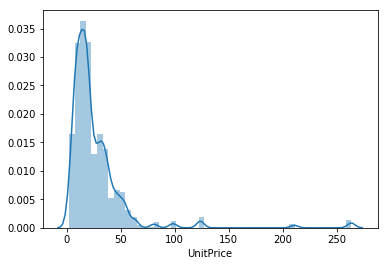

In [212]:
sns.distplot(order_details.UnitPrice)

C:\Users\sparr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


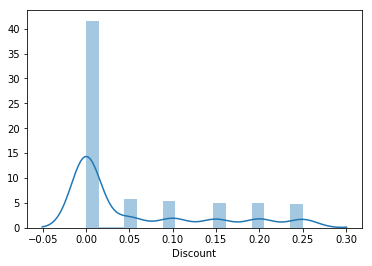

In [213]:
sns.distplot(order_details.Discount)